# 모폴로지 연산

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50, 300), fontScale=5, fontFace=font, color=(255, 255, 255), thickness=25)
    return blank_img

In [45]:
def display_img(img):
    fig = plt.figure(figsize=(12, 20))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

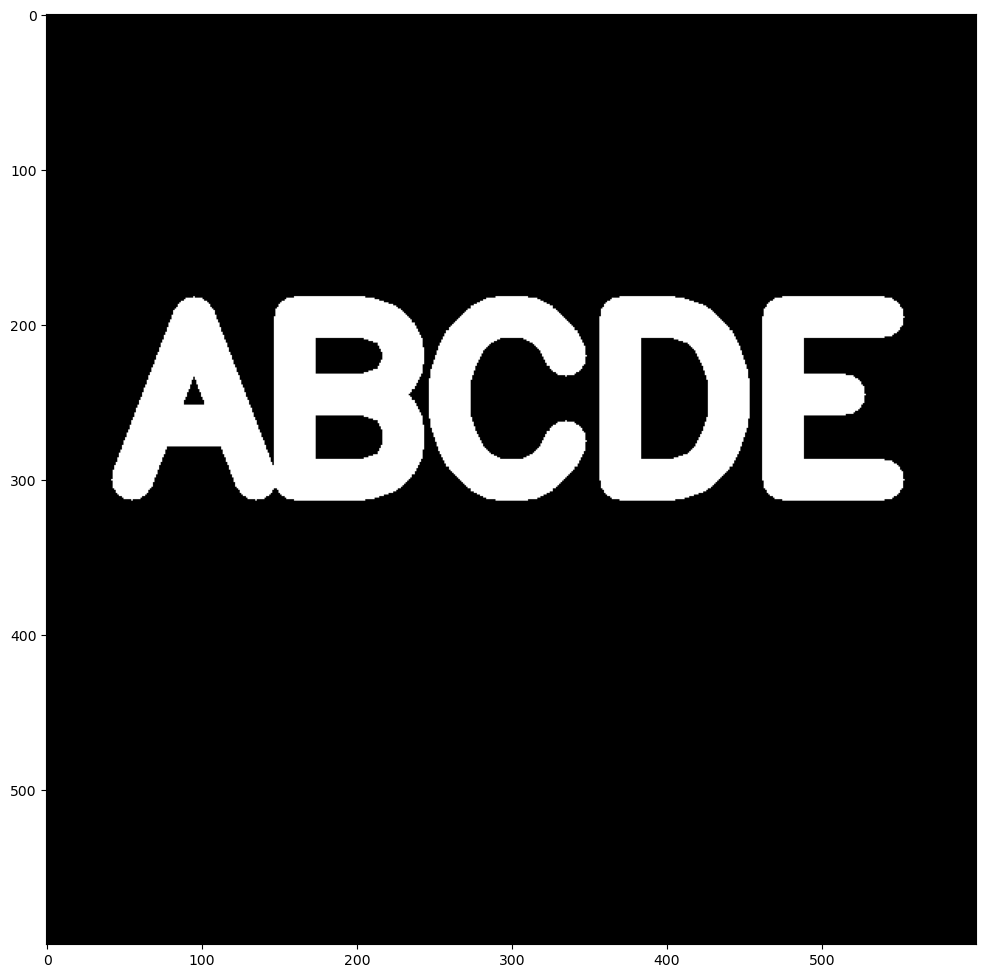

In [51]:
img = load_img()
display_img(img)

##### kernel = np.ones((5,5), dtype=np.uint8)

In [52]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [53]:
result = cv2.erode(img, kernel, iterations=5) # iterations: 반복변수를 많이 수정하게 됨, 많이 침식시키기 원하면, 많은 반복 변수를 입력하기만 하면 된다. 

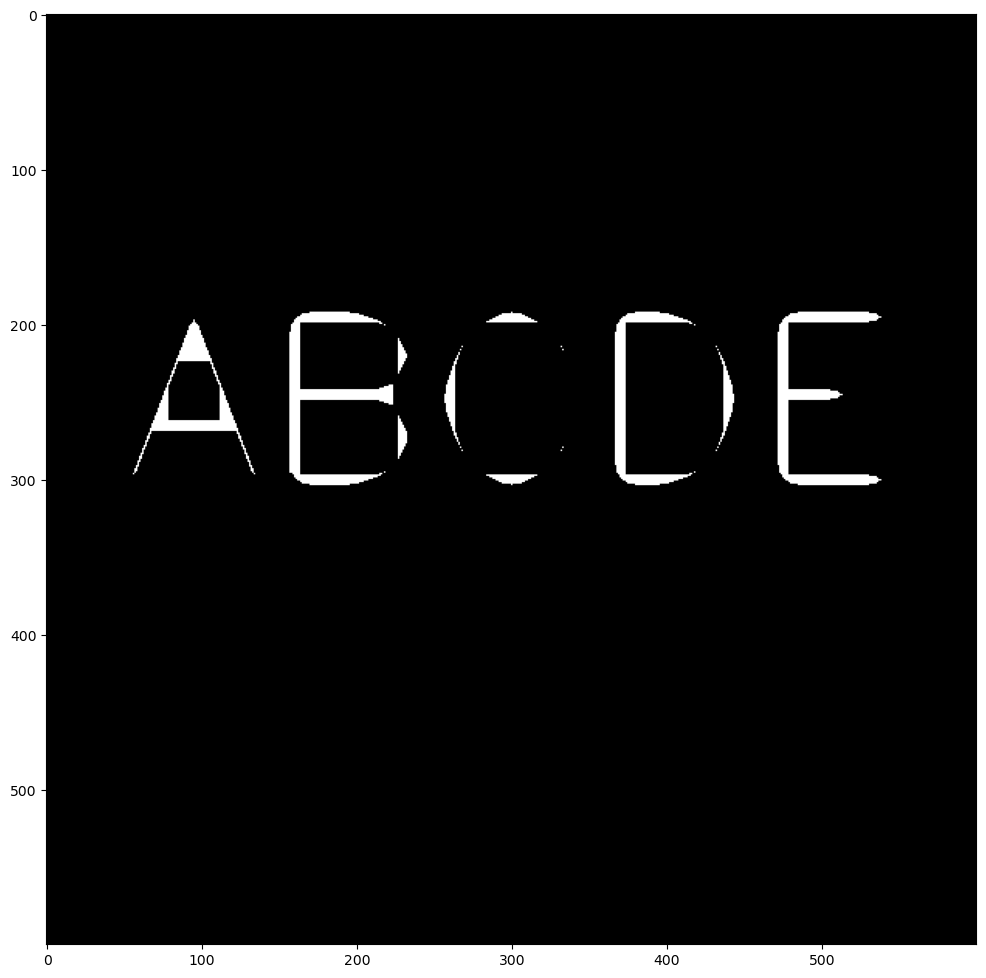

In [54]:
display_img(result)

In [70]:
# 오프닝 효과, 요프닝은 팽창 다음에 오는 침식을 의미함. 
#팽창은 침식과 반대, 팽창은 전면에 더 많은 추가
# 오프닝의 장점은 후면의 노이즐르 제거하는데 실제로 도움이 된다는 사실. 
# 화이트 노이즈를 이용해 원본 이미지에 입력

In [69]:
img = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600, 600)) #0과 1만, 2를 포함하지 않음. 

In [57]:
white_noise

array([[1, 1, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1]])

In [59]:
#display_img(white_noise)
#랜덤한 블랙 스폿, 화이트 스폿. 

In [61]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
img.max()

255.0

In [64]:
white_noise = white_noise * 255

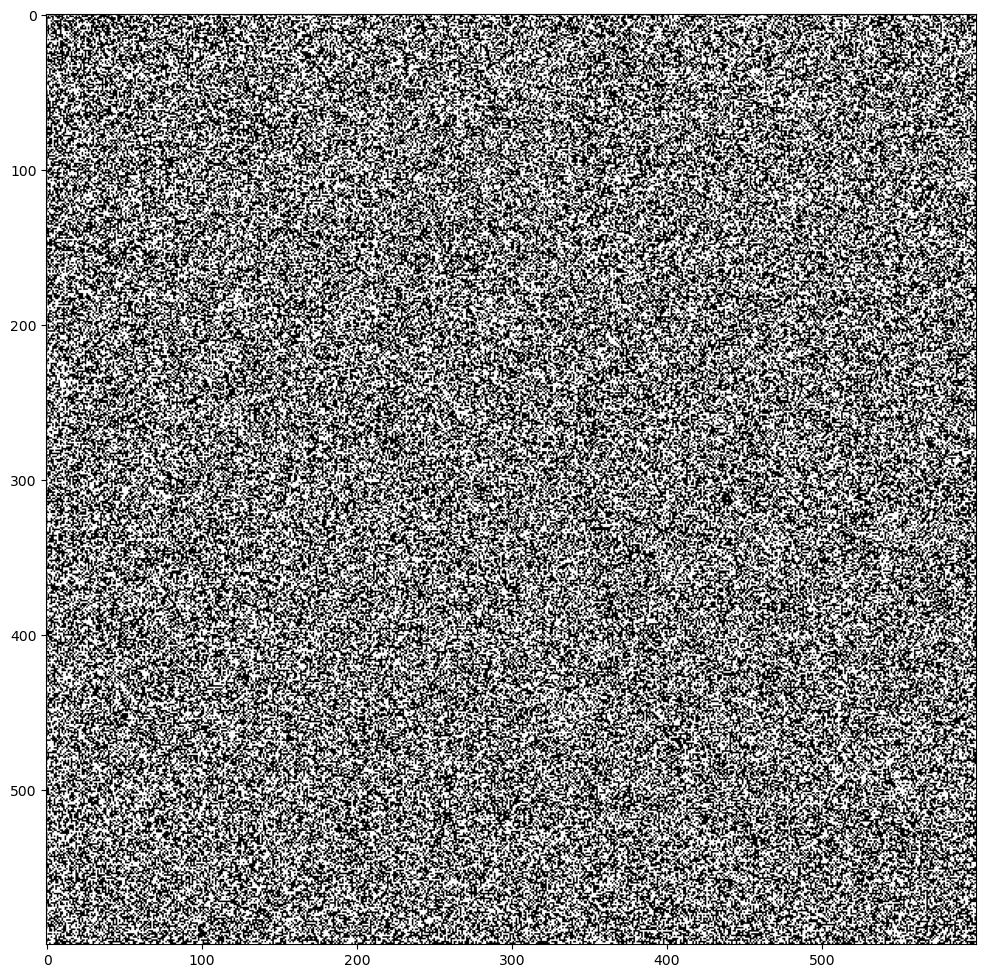

In [66]:
display_img(white_noise)

In [67]:
noise_img = white_noise+ img

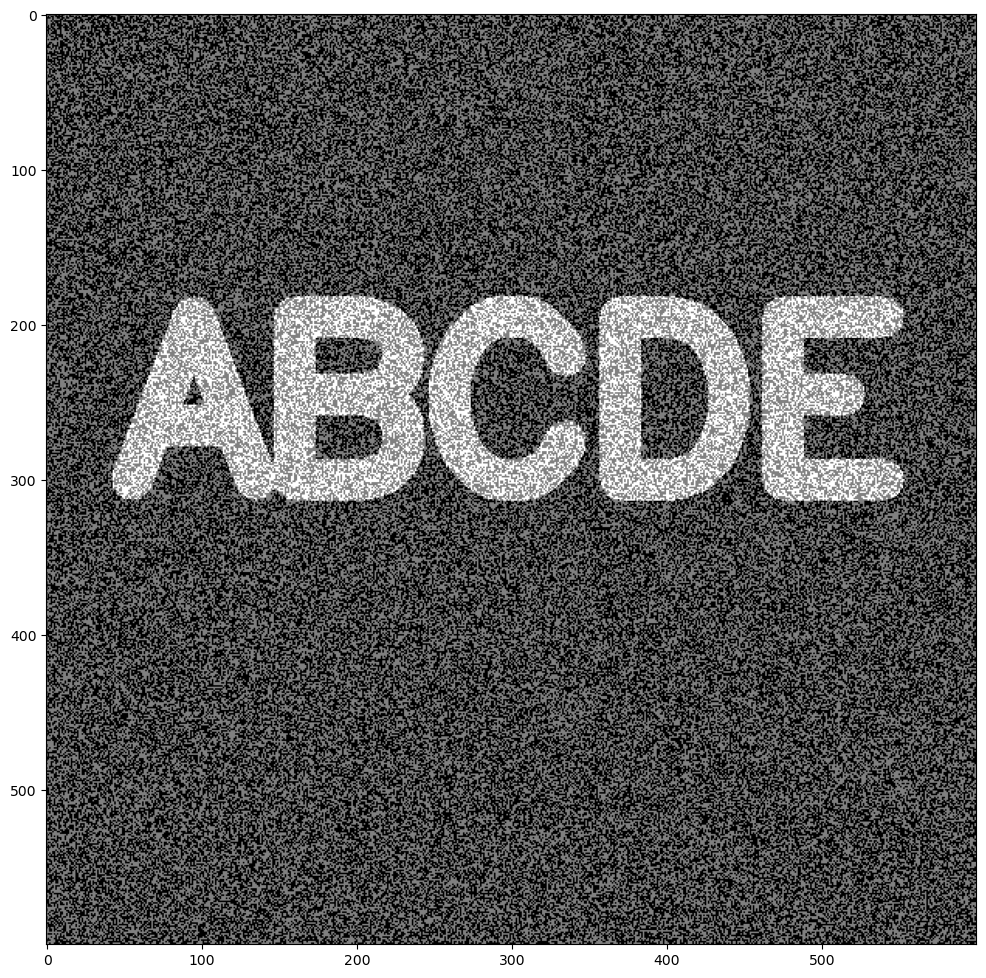

In [68]:
display_img(noise_img)

In [71]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

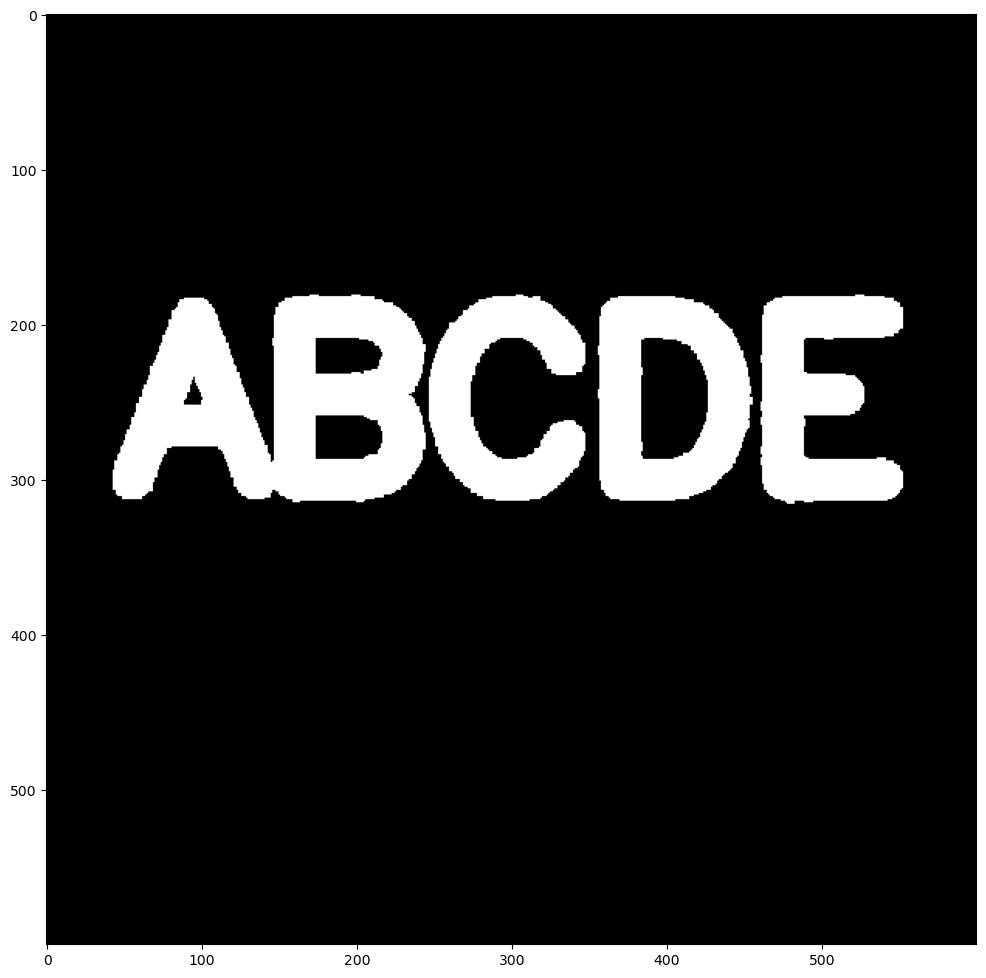

In [72]:
display_img(opening)

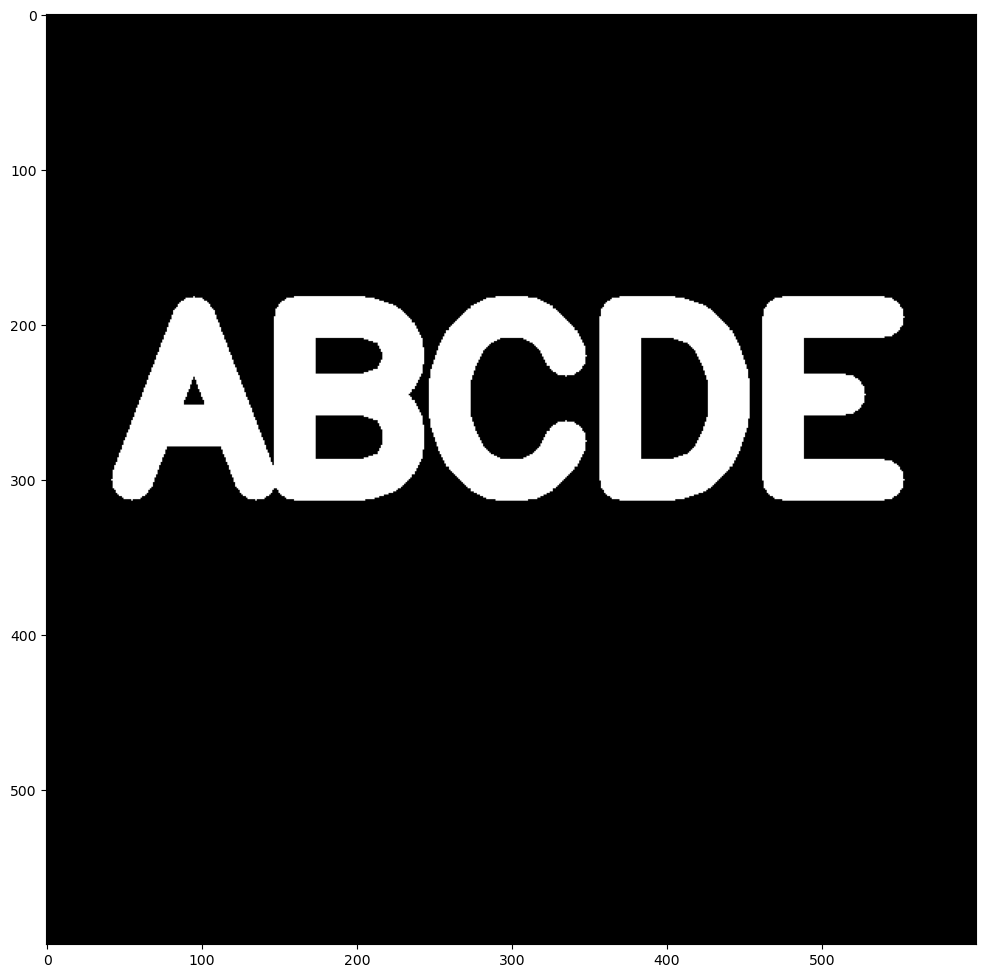

In [73]:
display_img(img)

In [74]:
img = load_img()

In [75]:
black_noise = np.random.randint(low=0, high=2, size=(600, 600))

In [77]:
black_noise

array([[0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 0]])

In [78]:
black_noise = black_noise* -255

In [82]:
black_noise_img = img + black_noise

In [83]:
black_noise_img

array([[   0.,    0., -255., ..., -255.,    0.,    0.],
       [-255.,    0.,    0., ..., -255., -255., -255.],
       [-255., -255.,    0., ...,    0., -255.,    0.],
       ...,
       [-255.,    0.,    0., ...,    0.,    0., -255.],
       [   0.,    0.,    0., ..., -255.,    0., -255.],
       [-255., -255.,    0., ...,    0., -255.,    0.]])

In [84]:
black_noise_img[black_noise_img == -255] = 0

In [85]:
black_noise_img.min()

0.0

In [86]:
black_noise_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

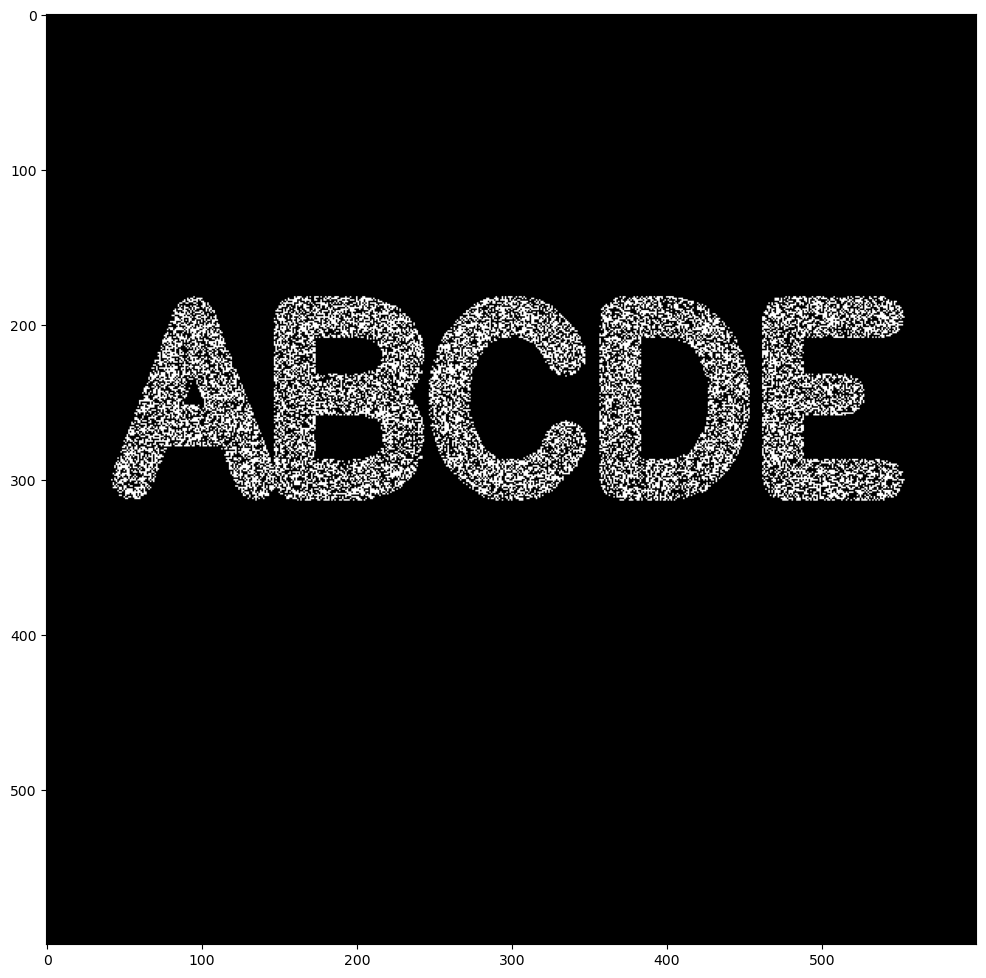

In [87]:
display_img(black_noise_img)

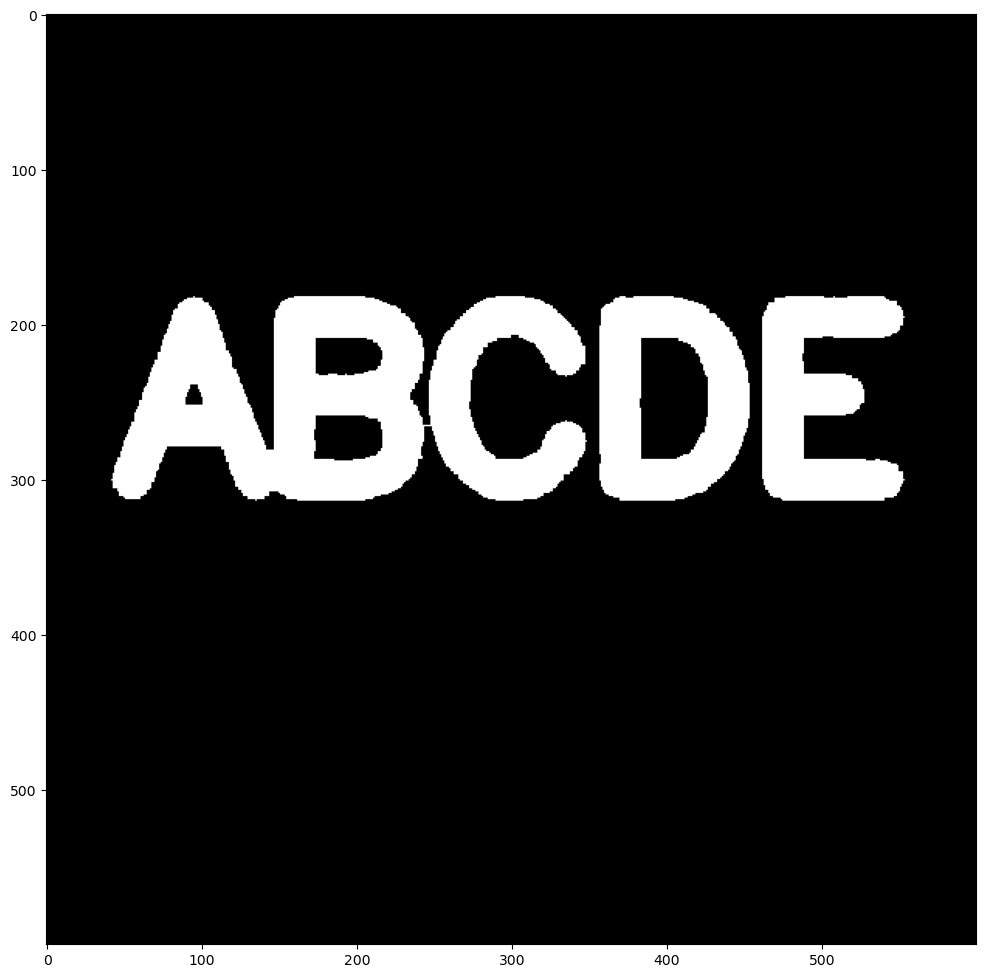

In [88]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

## 형태 그라디언트 이미지 팽창과 침식간의 차이를 구하는 것

In [89]:
img = load_img()

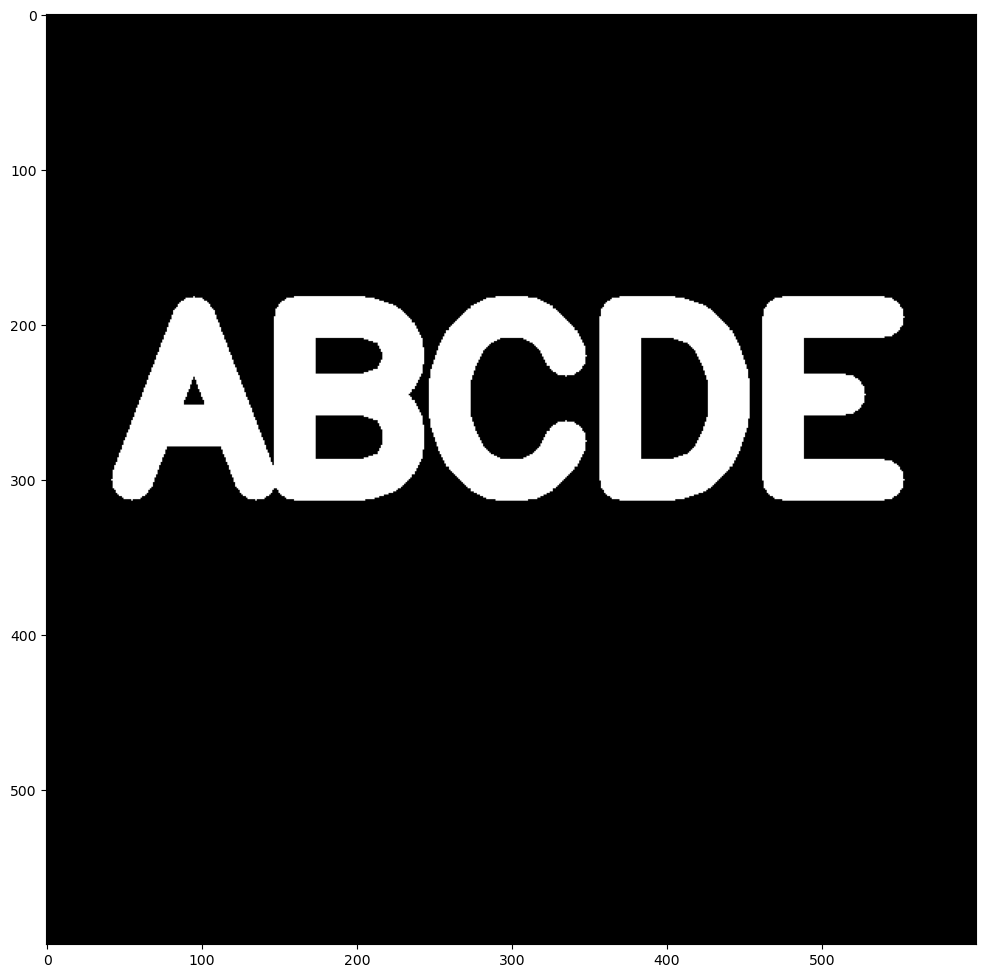

In [90]:
display_img(img)

In [91]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

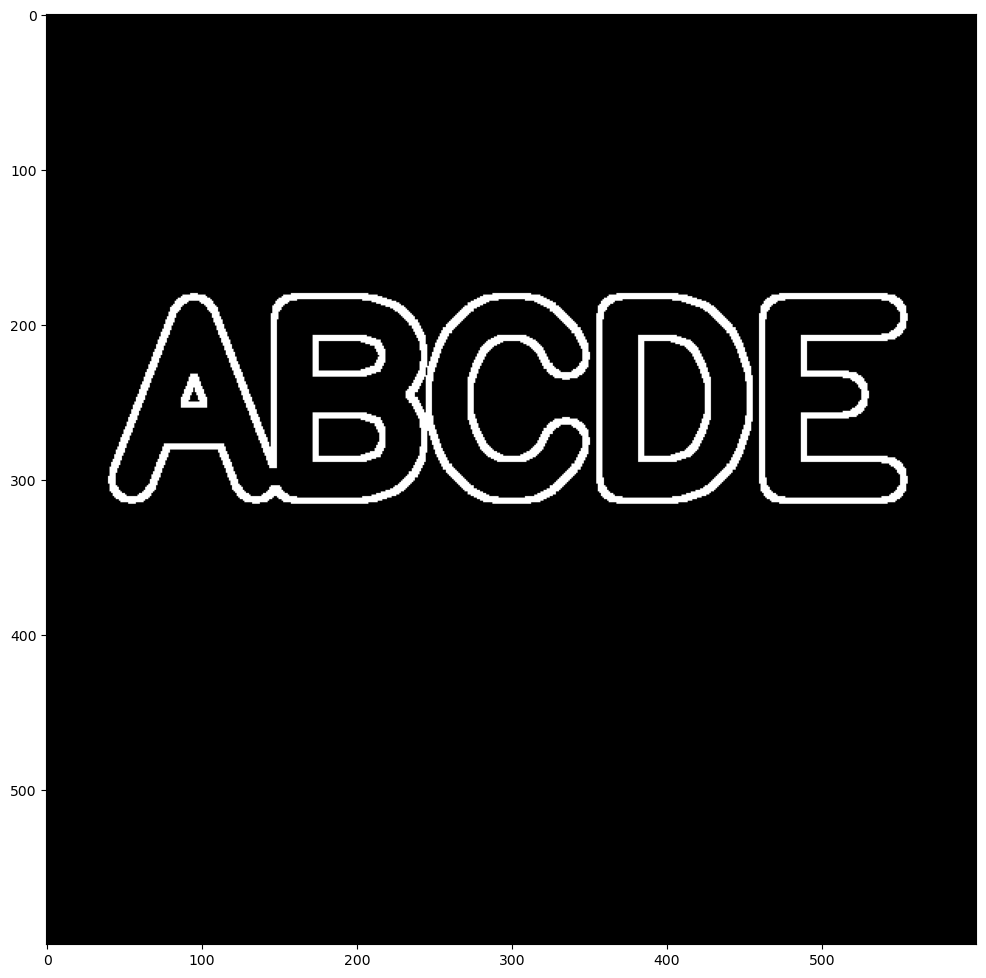

In [92]:
display_img(gradient)